In [1]:
library(pracma)

In [23]:
n = 10000

x1 <- rnorm(n) # "truth" model (data)
x2 <- 0.8 * rnorm(n) + 1 # model 1
x3 <- 0.5 * rnorm(n) - 1 # model 3 components
x4 <- 0.7 * rnorm(n) - 3
x5 <- 5.0 * rnorm(n) - 0.5 

x <- seq(-6, 6, by=0.01)

In [25]:
f <- histc(x1, x)$cnt + 0.01
g1 <- histc(x2, x)$cnt + 0.01

g2a <- histc(x3, x)$cnt + 0.01
g2b <- histc(x4, x)$cnt + 0.01
g2 <- g2a + 0.3*g2b + 0.01
g3 <- histc(x5, x)$cnt + 0.01


f <- f/trapz(x,f)  # normalize data
g1 <- g1/trapz(x,g1) 
g2 <- g2/trapz(x,g2)
g3 <- g3/trapz(x,g3);

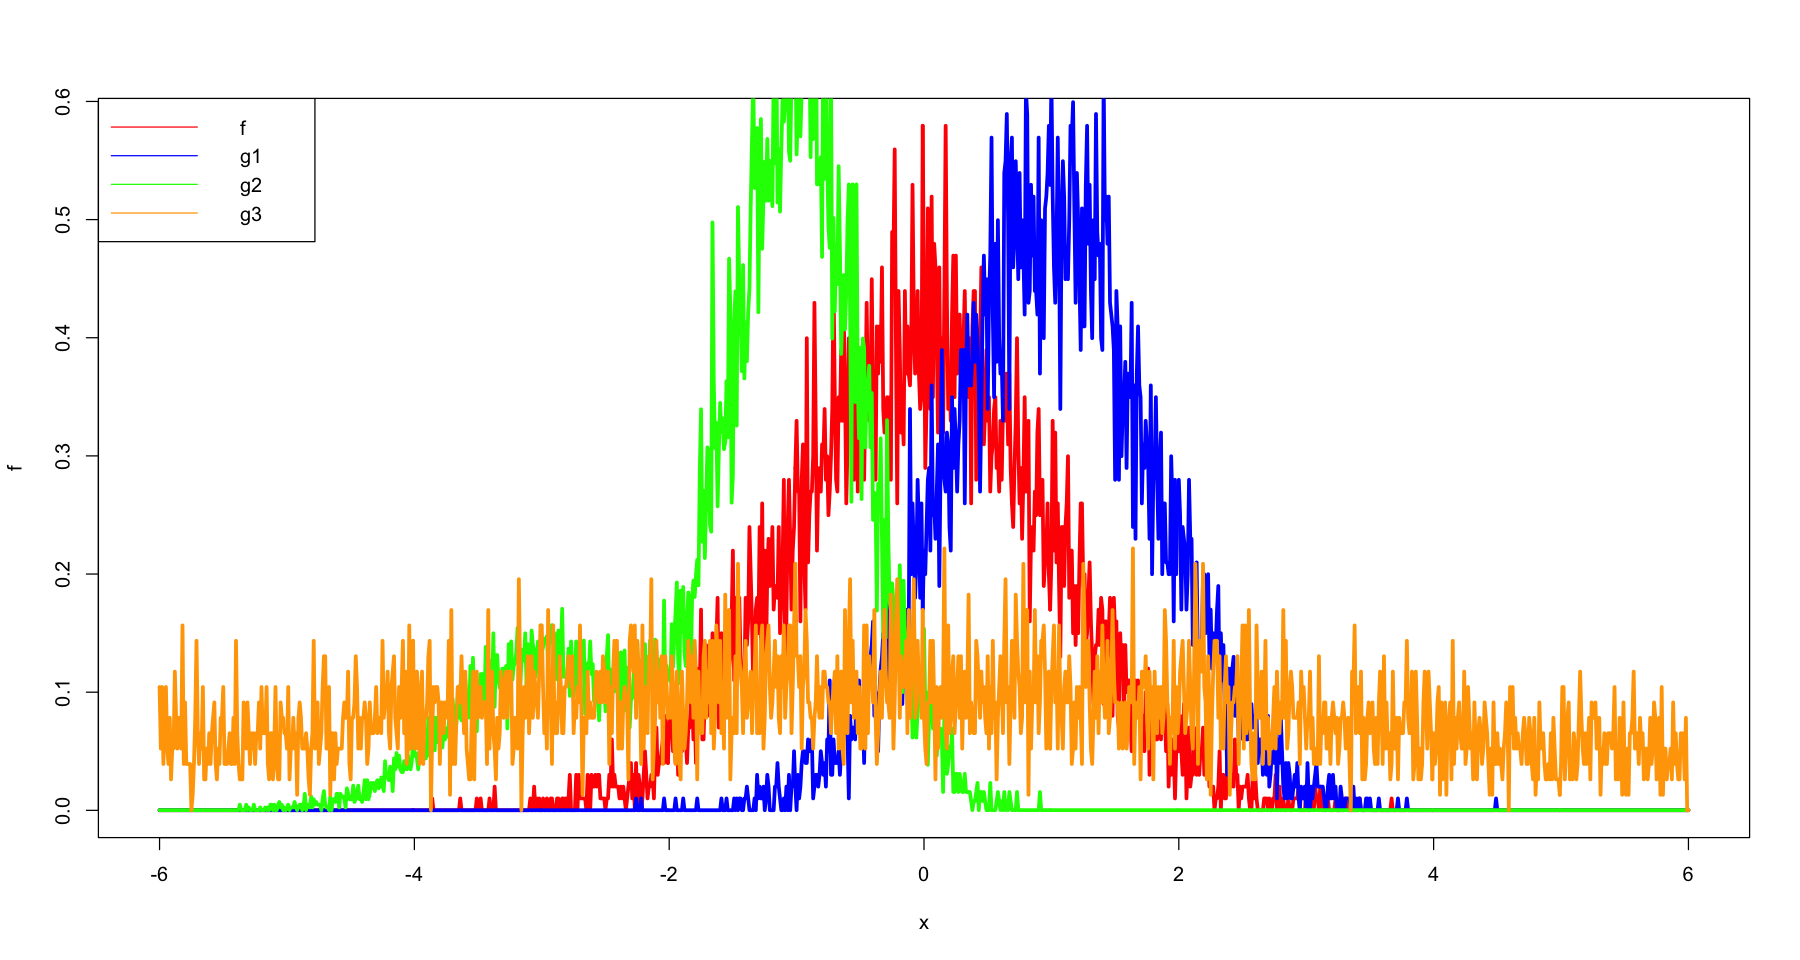

In [34]:
options(repr.plot.width=15, repr.plot.height=8)


plot(x, f, type="l", col="red", lwd=3)
lines(x, g1, type="l", col="blue", lwd=3)
lines(x, g2, type="l", col="green", lwd=3)
lines(x, g3, type="l", col="orange", lwd=3)

legend("topleft", legend=c("f", "g1", "g2", "g3"), 
       col=c("red", "blue", "green", "orange"), lwd=1, lty=c(1,1,1,1), 
       pch=c(NA,NA,NA))

In [ ]:
# compute integrand
Int1 <- f*log(f/g1)
Int2 <- f*log(f/g2)
Int3 <- f*log(f/g3)

# KL divergence
I1 <- trapz(x,Int1)
I2 <- trapz(x,Int2)
I3 <- trapz(x,Int3)